In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#read datasets .
import pandas as pd
data=pd.read_csv('data.csv', index_col=0) #set index column as 0.
test=pd.read_csv('test.csv', index_col=0) #set index column as 0

In [ ]:
#take a look into our dataset
data

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


<Axes: xlabel='label'>

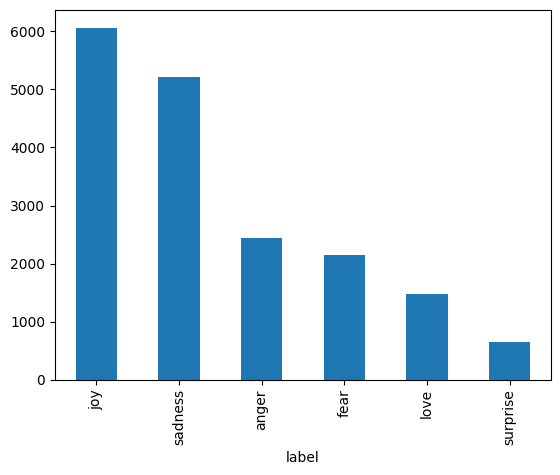

In [ ]:
data.label.value_counts().plot(kind='bar')

<Axes: xlabel='label'>

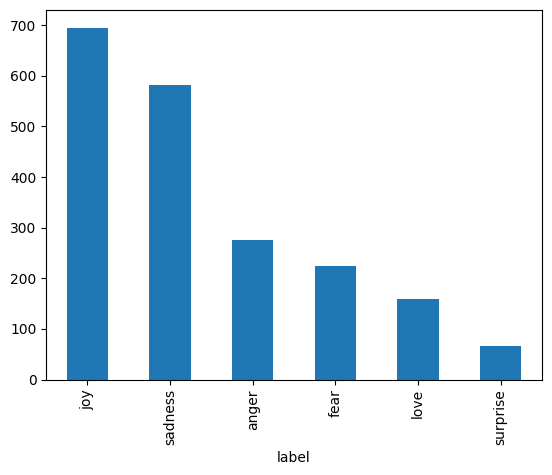

In [ ]:
test.label.value_counts().plot(kind='bar')

In [ ]:
data.isna().any(axis=1).sum()

0

In [ ]:
#encode categorical values to numerical values using LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])
test['N_label'] = label_encoder.fit_transform(test['label'])

In [ ]:
data

,text,label,N_label
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,4
17996,i constantly worry about their fight against n...,joy,2
17997,i feel its important to share this info for th...,joy,2
17998,i truly feel that if you are passionate enough...,joy,2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = data['text'],test['text'], data['N_label'],test['N_label']

In [ ]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.svm import LinearSVC
import preprocess as ps
from sklearn.feature_extraction.text import CountVectorizer
#create pipline of countervectoriser and linearSVC model
#Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


pipe = Pipeline([('scaler',CountVectorizer(max_features=5000,ngram_range=(1,3), preprocessor=ps.preprocess)),('model', LinearSVC())])

In [ ]:
# train the pipline
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 CountVectorizer(max_features=5000, ngram_range=(1, 3),
                                 preprocessor=<function preprocess at 0x7fa101879900>)),
                ('model', LinearSVC())])

In [ ]:
pred=pipe.predict(X_train)
pred_test=pipe.predict(X_test)

In [ ]:
#calculate accuracy of training and test sets
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 99.25


In [ ]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(pred_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.95


In [ ]:
text='I feel happy'
pred = pipe.predict([text])
label_encoder.inverse_transform(pred)[0]

'joy'

In [ ]:
#serialise pipe model and LabelEncoder function to use them later.
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))
pickle.dump(label_encoder, open('encoder.pkl', 'wb'))